# Clase 13 Transformada de Laplace 

Tomado de Dennis Zill, página 255 del pdf 

7.1 Definición de transformada de Laplace  
7.2 Transformadas inversas y transformadas de derivadas.  
7.3 Propiedades operacionales I
  * Translación en el eje $s$  
  * Translación en el eje $t$  
  
7.4 Propiedades operacionales II  
  * Derivadas de la transformada  
  * Transformada de una función periódica 
  
7.5 La función delta de Dirac    
7.6 Sistemas de ecuaciones diferenciales lineales   

En los modelos matemáticos lineales para sistemas físicos tales como un sistema resorte - masa o un circuito eléctrico en serie, el miembro del lado derecho o entrada de las ecuaciones diferenciales

$$ m\frac{d^{2}x}{dt^{2}} + \beta\frac{dx}{dt} + kx = f(t) $$

o

$$  L\frac{d^{2}q}{dt^{2}} + R\frac{dq}{dt} + \frac{1}{C}q = E(t)  $$

es una función de conducción y representa ya sea una fuerza externa $f(t)$ o un voltaje aplicado $E(t)$. 


En la sección 5.1 consideramos problemas en los que las funciones $f$ y $E$ eran continuas. 

Sin embargo, las funciones de conducción discontinua son comunes. 

Por ejemplo, el voltaje aplicado a un circuito podría ser continuo en tramos y periódico tal como la función `diente de sierra` que se muestra seguidamente.  

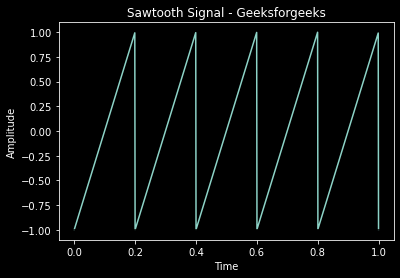

In [10]:
from scipy import signal 
import matplotlib.pyplot as plot 
import numpy as np 
plt.style.use('dark_background')  
t = np.linspace(0, 1, 1000, endpoint=True) 
  
plot.plot(t, signal.sawtooth(2 * np.pi * 5 * t)) 
  
plot.xlabel('Time') 
plot.ylabel('Amplitude') 
plot.title('Sawtooth Signal - Geeksforgeeks') 
  
plot.axhline(y=-1, color='k')  
  
plot.show() 

En este caso, resolver la ecuación diferencial del circuito es difícil usando las tecnicas del capítulo 4. 

La transformada de Laplace que se estudia en este capítulo es una valiosa herramienta que simplifica la solución de problemas como éste. 

Página 256 del Zill

# 7.1 Definición de la Transformada de Laplace 

## Repaso del material

* Integrales impropias 

$$ \int_{1}^{\infty} \frac{1}{x}dx $$

$$ \int_{0}^{\infty} e^{-x} dx $$

In [11]:
from sympy import *
x = symbols('x')
integrate(exp(-x), (x,0,oo)) 

1

* Descomposición en fracciones parciales 

$$\frac{1}{(x-1)(x+1)}$$

$$ \frac{1}{(x-1)(x+1)} = \frac{A}{x-1} + \frac{B}{x+1} $$

$$ \frac{1}{(x-1)(x+1)} = \frac{A(x+1) + B(x-1)}{(x-1)(x+1)} $$

$$ 1 = (A+B)x + (A-B) $$

Utilizando la comparación de funciones polinómicas podemos decir:

$$ 0x + 1 = (A+B)x + (A-B) $$

\begin{align*}
A+B & = 0 \\
A-B & = 1
\end{align*}


Sumando las ecuaciones lado a lado obtenemos:

$$ 2A = 1 \Rightarrow A = \frac{1}{2} $$


como $A + B = 0$, entonces 

$$ B = -\frac{1}{2} $$

## Introducción 

En cálculo elemental aprendió que la derivación y la integración son *transformadas*; esto significa, a grandes rasgos, que estas operaciones transforman una función en otra. 

Por ejemplo, la función $f(x) = x^{2}$ se transforma,  a su vez, en una función lineal y en una familia de funciones polinomiales cúbicas con las operaciones de derivación e integración:

$$ \frac{d}{dx}x^{2} = 2x,$$ 

$$  \text{y} \ \ \  \int x^{2}dx = \frac{1}{3}x^{3} + c $$

Además, estas dos transformadas tienen la **propiedad de linealidad** tal que la transformada de una combinación lineal de funciones es una combinación lineal de las transformadas. 

Para $\alpha$ y $\beta$ constantes 
$$ \frac{d}{dx}[\alpha f(x) + \beta g(x)] = \alpha \frac{d}{dx}f(x) + \beta \frac{d}{dx}g(x)  $$

y 

$$ \int [\alpha f(x) + \beta g(x)]dx = \alpha \int f(x) dx + \beta \int g(x) dx $$

siempre que cada derivada e integral existan. 

En esta sección se examina un tipo especial de transformada integral llamada **transformada de Laplace**. 

Además de tener la propiedad de linealidad, la transformada de Laplace tiene muchas otras propiedades interesantes que la hacen muy útil para resolver problemas lineales con valores iniciales. 

## Transformada integral 

Si $f(x,y)$ es una función de dos variables, entonces una integral definida respecto a una de las variables conduce a una función de la otra variable. 

Por ejemplo, si se conserva $y$ constante, se ve que 

$$\int_{1}^{2} 2xy^{2}dx  = 3y^{2}.$$


De igual modo, una integral definida como 

$$\int_{a}^{b}K(s,t)f(t)dt $$

transforma una función $f$ de la variable $t$ en una función $F$ de la variable $s$. 


Tenemos un particular interes en una transformada integral, donde el intervalo de integración es el intervalo no acotado $[0,\infty)$. 

Si $f(t)$ se define para $t \geq 0$, entonces la integral impropia 

$$\int_{0}^{\infty} K(s,t)f(t)dt$$

se define como un límite 

$$\int_{0}^{\infty} K(s,t)f(t)dt = \lim_{b \to \infty} \int_{0}^{b} K(s,t)f(t)dt. $$


Si existe el límite anterior, entonces se dice que la integral existe o es **convergente**; si no existe el límite, la integral no existe y es **divergente**. 

En general, el límite en 
$$\int_{0}^{\infty} K(s,t)f(t)dt = \lim_{b \to \infty} \int_{0}^{b} K(s,t)f(t)dt $$
existirá solo para ciertos valores de la variable $s$. 

## Una definición

La función $K(s,t)$ en 
$$\int_{0}^{\infty} K(s,t)f(t)dt = \lim_{b \to \infty} \int_{0}^{b} K(s,t)f(t)dt $$

se llama **kernel** o **núcleo** de la transformada.   
La elección de $K(s,t) = e^{-st}$ como el núcleo nos proporciona una transformada integral especialmente importante. 

## Definición 7.1.1 Transformada de Laplace

Sea $f$ una función definida para $t \geq 0$.  
Entonces, se dice que la integral 

$$ L\{f(t)\} = \int_{0}^{\infty}e^{-st}f(t)dt $$

es la **transformada de Laplace** de $f$, siempre que la integral converja. 


Cuando la integral 

$$ L\{f(t)\} = \int_{0}^{\infty}e^{-st}f(t)dt $$

converge, el resultado es una función de $s$. 

* En el análisis general se usa una letra minúscula para denotar la función que se transforma y   
* la letra mayúscula correspondiente para denotar su transformada de Laplace, por ejemplo
$$ L\{f(t)\} = F(s) , \quad \ \  L\{g(t)\} = G(s) , \quad \ \  L\{y(t)\} = Y(s).    $$

## Ejemplo 1

Evalúe $L\{1\}$ 

### Solución:
\begin{align*}
L\{1\} & =  \int_{0}^{\infty}e^{-st}(1)dt \\
       & = \lim_{b \to \infty} \int_{0}^{b}e^{-st}dt \\
       & = \lim_{b \to \infty} \left. \frac{1}{-s}e^{-st} \right|_{0}^{b} \\ 
       & = \frac{1}{s} \lim_{b \to \infty} -(e^{-sb} - e^{-s(0)} ) \\
       & 
\end{align*}

\begin{align*}
& = \frac{1}{s}\lim_{b \to \infty} (1 - e^{-sb})
\end{align*}

note que $e^{-sb}$ es una exponencial **no positiva** si $s$ es positivo. Por tanto, para que nuestra integral impropia converja, debemos asumir que $s > 0$. 

$$ = \frac{1}{s} $$

## Ejemplo 2  
Evalúe $L\{t\}$  
[Laplace transforms in wolfram](https://www.wolframalpha.com/input/?i=laplace+transform%281%29)

In [12]:
from sympy import *
init_printing()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
t, s = symbols('t, s')
a = symbols('a', real=True, positive=True)

In [15]:
f = Function('f')(t) 

In [16]:
f = t

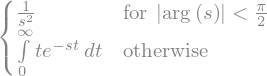

In [17]:
integrate(f*exp(-s*t), (t, 0, oo))

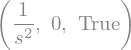

In [18]:
laplace_transform(f, t, s)

### Solución analítica: 

\begin{align*}
L\{t\} & = \int_{0}^{\infty} e^{-st}tdt \\
       & = \lim_{b \to \infty} \int_{0}^{b} te^{-st}dt \\
\end{align*}

$$ \int_{0}^{b} te^{-st} dt $$

$$ u = t, \ \ \ \ dv = e^{-st}dt $$

$$ du = dt, \ \ \ \ v = \frac{1}{-s} e^{-st} $$


$$ \int_{0}^{b} te^{-st} dt = - \frac{1}{s}te^{-st} + \frac{1}{s}\int_{0}^{b} e^{-st}dt $$

$$ \int_{0}^{b} te^{-st} dt = \left. - \frac{1}{s}te^{-st}\right|_{0}^{b} + \frac{1}{s} \left. \frac{ e^{-st} }{-s}\right|_{0}^{\infty} $$

## Ejemplo 3
Evalue $\mathcal{L}\{e^{-3t}\}$

### Solución: 


$$ L\{ e^{-3t} \}  = \int_{0}^{\infty} e^{-st}e^{-3t} dt $$
              



$$ = \int_{0}^{\infty} e^{-(s+3)t} $$

$$ = \left. -\frac{1}{s+3} e^{-(s+3)t} \right|_{0}^{\infty} $$

note que esta integral converge si $s + 3 > 0$, es decir, si $s > -3$. 

$$ = \frac{1}{s+3} \left[e^{-(s+3)(0)} - e^{-(s+3)(\infty)} \right] $$

## Ejemplo 4
Evalue $L\{\sin 2t\}$

### Solución:

$$ L\{\sin 2t \} = \int_{0}^{\infty} e^{-st}\sin 2t \ dt $$

Como el integrando es el producto de una función exponencial y una función trigonométrica entonces esta integral se resuelve aplicando el método de integración por partes aplicado dos veces. 

## $L$ es una transformación lineal

$$L[\alpha f(t) + \beta g(t)] = \alpha L[f(t)] + \beta L[g(t)]$$

Para una combinación lineal de funciones podemos escribir 

\begin{align*}
L\{\alpha f(t) + \beta g(t)\} & = \int_{0}^{\infty}e^{-st}[\alpha f(t) + \beta g(t)] dt \\
                              & = 
\end{align*}


$$ =  \int_{0}^{\infty} \left[ \alpha e^{-st}f(t) + \beta e^{-st}g(t) \right]\ dt $$

$$ =  $$

## Teorema: Transformada de algunas funciones básicas

1.  $$ L\{1\} = \frac{1}{s} $$
2.  $$ L\{t^{n}\} = \frac{n!}{s^{n+1}}, \ \ \ n = 1,2,3,\ldots $$
3.  $$ L\{e^{at}\} = \frac{1}{s-a} $$

4.  $$ L\{ \sin kt \} = \frac{k}{s^{2} + k^{2}} $$
5.  $$ L\{ \cos kt \} = \frac{s}{s^{2} + k^{2}} $$

6.  $$ L\{\sinh kt \} =  \frac{k}{s^{2} - k^{2}} $$
7.  $$ L\{\cosh kt \} = \frac{s}{s^{2} - k^{2}} $$

## Condiciones suficientes para la existencia de $L\{f(t)\}$

La integral que define la transformada de Laplace no tiene que converger. 

Por ejemplo, no existe 

$$ L \left\{ \frac{1}{t} \right\} $$

$$ L\{e^{t^{2}}\} $$


Las condiciones suficientes que garantizan la existencia de $L\{f(t)\}$ son que $f$ sea continua por tramos en $[0,\infty)$ y que $f$ sea de orden exponencial para $t > T$. 

Recuerde que una función es continua por tramos en $[0,\infty)$ si, en cualquier intervalo 

$$ 0 \leq a \leq t \leq b, $$

hay un número finito de puntos $t_{k}$, $k = 1,2,\ldots, n$, ($t_{k-1} < t_{k}$) en los que $f$ tiene discontinuidades finitas y es continua en cada intervalo abierto $(t_{k-1}, t_{k})$. 

<img src = 'https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/clases/class_13/figura_7_1_1.PNG?raw=true'>

El concepto de orden exponencial se define de la siguiente manera: 

## Definición de orden exponencial

Se dice que $f$ es de **orden exponencial** $\mathbf{c}$ si existen constantes $c$, $M > 0$ y $T > 0$ tales que 

$$ |f(t)| \leq Me^{ct}, \ \ \ \ t > T.  $$


Si $f$ es una función creciente, entonces la condición $|f(t)| \leq Me^{ct}$, $t > T$, simplemente establece que la gráfica de $f$  en el intervalo $(T, \infty)$ no crece más rápido que la gráfica de la función exponencial $Me^{ct}$, donde $c$ es una constante positiva. 

<img src = 'https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/clases/class_13/figura_7_1_3.PNG?raw=true'> 

Las funciones $f(t) = t$, $f(t) = e^{-t}$ y $f(t) = 2\cos t$ son de orden exponencial $c = 1$ para $t > 0$ puesto que se tiene respectivamente

$$ |t| \leq e^{t}, \ \ \ |e^{-t}| \leq e^{t}, \ \ \\text{y} \ \ \  |2\cos t| \leq 2e^{t}.  $$


<img src = 'https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/clases/class_13/figura_7_1_4.PNG?raw=true'>

## Teorema 7.1.2 Condiciones suficientes para la existencia

Si $f$ es una función continua por tramos en $[0,\infty)$ y de orden exponencial $c$, entonces $L\{f(t)\}$ existe para $s > c$.  

### Demostración: 

## Ejemplo 5 Transformada de una función continua por tramos

Evaúe $L\{f(t)\}$ donde 

$$ f(t) = \begin{cases} 0 & 0 \leq t < 3 \\ 2 & t \geq 3  \end{cases} $$

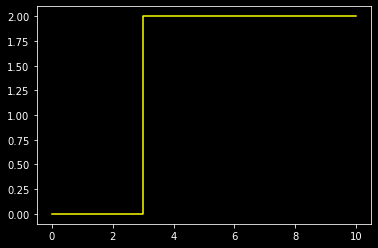

In [19]:
# Funciones definidas a trozos (piecewise) con numpy 
# https://numython.github.io/posts/2016/02/funciones-definidas-trozos-piecewise/
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 
x1 = np.linspace(0,3)
x2 = np.linspace(3,10)
y1 = 0*x1
y2 = 2*np.ones_like(x2)
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
fig, ax = plt.subplots() 
ax.plot(x,y, color = 'yellow')   

### Solución 

La función que se muestra en la figura enterior es continua por tramos y de orden exponencial para $t > 0$. 

Puesto que $f$ se define en dos tramos, $L\{f(t)\}$ se expresa como la suma de dos integrales: 

\begin{align*}
L\{f(t)\} = \int_{0}^{\infty} e^{-st}f(t)\ dt & =  + \\
          & = \\
          & = 
\end{align*}


## Teorema 7.1.3 Comportamiento de $F(s)$ conformo $s \to \infty$

Si $f$ es continua por partes en $(0,\infty)$ y de orden exponencial y $F(s) = L\{f(t)\}$, entonces 

$$ \lim_{s \to \infty} F(s) = 0 $$


### Demostración: 

## Comentarios

i. En este capítulo  nos dedicaremos principalmente a funciones que son continuas por tramos y de orden exponencial.   

ii. 

## Sección 7.2 Transformadas inversas y transformadas de derivadas

Página 278 del Zill

## Repaso de material
* Descomposición en fracciones parciales. 

## Introducción 

### Conceptos necesarios para abordar el tema:

* Descomposición en fracciones parciales

## 7.2.1 Transformadas inversas

### El problema inverso 

Si $F(s)$ representa la transformada de Laplace de una función $f(t)$, es decir, $L\{f(t)\} = F(s)$, se dice entonces que $f(t)$ es la **transformada de Laplace inversa** de $F(s)$ y se escribe

$$L^{-1}\{F(s)\} = f(t) $$


|Transformada|Transformada inversa|  
|-|-|  
|$L\{1\} = \frac{1}{s}$| $1 = L^{-1}\left\{ \frac{1}{2} \right\}$ |
|$L\{t\} = \frac{1}{s^{2}} $|$t = L^{-1} \left\{ \frac{1}{s^{2}} \right\}$|
|$L\{ e^{-3t}\}=\frac{1}{s + 3}$|$e^{-3t} = L^{-1}\left\{ \frac{1}{s+3} \right\}$|

Pronto veremos que en la aplicación de la transformada de Laplace a ecuaciones no se puede determinar de manera directa una función desconocida $f(t)$; más bien, se puede despejar la transformada de Laplace $F(s)$; pero a partir de ese conocimiento, se determina $f$ calculando 

$$ f(t) = L^{-1} \{F(s)\}. $$

La idea es simplemente esta:   

suponga que 

$$ F(s) = \frac{-2s + 6}{s^{2} + 4} $$

es una transformada de Laplace; encuentre una función $f(t)$ tal que $L\{f(t)\} =  F(s)$.

Este ejercicio lo realizaremos posteriormente. 

## Teorema 7.2.1 Algunas transformadas inversas 

a. $1 = L^{-1} \left\{ \frac{1}{2} \right\}$  

b. $t^{n} = L^{-1} \left\{ \frac{n!}{s^{n+1}} \right\}$, $n = 1,2,3,\ldots$.   

c. $e^{at} = L^{-1}\left\{ \frac{1}{s-a} \right\} $  

d. $\sin kt = L^{-1}\left\{ \frac{k}{s^{2} + k^{2}} \right\}$  

e. $$\cos kt = L^{-1} \left\{ \frac{s}{s^{2} + k^{2}} \right\} $$

Al evaluar las transformadas inversas, suele suceder que una función de $s$ que estamos considerando no concuerda exactamente con la forma de una transformada de Laplace $F(s)$ que se presenta en la tabla. 

Es posible que sea necesario arreglar la función de $s$ multiplicando y dividiendo entre una constante apropiada. 

## Ejemplo 1 Aplicando el teorema 7.2.1

Evalúe 

$$ a. L^{-1}\left\{ \frac{1}{s^{5}} \right\} \ \ \ \ b. L^{-1}\left\{ \frac{1}{s^{2} + 7} \right\} $$


In [20]:
# import inverse_laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import exp, Symbol
from sympy.abc import s, t

a = Symbol('a', positive = True)
# Using inverse_laplace_transform() method
gfg = inverse_laplace_transform(1/s**5, s, t)

print(gfg)


t**4*Heaviside(t)/24


### Solución del item $a.$

Para hacer coincidir la forma dada 

$$ \frac{n!}{t^{n+1}}, \ \ \ n = 1,2,3, \ldots $$

se identifica $n + 1 = 5$ o $n = 4$ y luego se multiplica y divide por $4!$: 

\begin{align*}
L^{-1} \left\{ \frac{1}{s^{5}} \right\} & =  
\end{align*}

### Solución del item b. 

\begin{align*}
L^{-1}\left\{ \frac{1}{s^{2} + 7} \right\} & = 
\end{align*}


## $L^{-1}$ es una transformada lineal 

$$ L^{-1} \{ \alpha F(s) + \beta G(s) \} = \alpha L^{-1}\{F(s)\} + \beta L^{-1}\{G(s)\} $$

## Ejemplo 2 División término a término y linealidad

Evalúe 

$$ L^{-1}\left\{ \frac{-2s + 6}{s^{2} + 4} \right\} $$

### Solución:

Empecemos distribuyendo el denominador para cada uno de los sumandos del numerador:

$$ \frac{-2s + 6}{s^{2} + 4}  $$


## Fracciones parciales 

Las fracciones parciales juegan un papel importante en la determinación de transformadas de Laplace inversas. 

## Ejemplo 3 Fracciones parciales: diferentes factores lineales 

Evalúe 

$$ L^{-1}\left\{ \frac{s^{2} + 6s + 9}{(s-1)(s-2)(s + 4)} \right\} $$


## 7.2.2 Transformadas de derivadas 

### Transformada de una derivada

Como se indicó en la introducción de la clase de hoy, el objetivo inmediato es usar la transformada de Laplace para resolver ecuaciones diferenciales. 

Para este fin, es necesario evaluar cantidades como 

$$ L \left\{ \frac{dy}{dt} \right\} $$

y 

$$ L \left\{ \frac{d^{2}y}{dt^{2}} \right\}. $$

Por ejemplo, si $f'$ es continua para $t \geq 0$, entonces integrando por partes se tiene 

\begin{align*}
L\{f'(t)\} & = 
\end{align*}


## Teorema 7.2.2 Transformada de una derivada 

Si $f,f', \ldots, f^{(n-1)}$ son continuas en $[0,\infty)$ y son de orden exponencial y si $f^{(n)}(t)$ es continua por tramos en $[0,\infty)$, entonces 

$$ L\{f^{(n)}(t)\} = s^{n}F(s) - s^{n-1}f(0) - s^{n-2}f'(0) - \cdots - f^{(n-1)}(0) $$

donde 

$$F(s) = L\{f(t)\} $$


## Solución de EDO lineales 

Es evidente del resultado general dado en el teorema anterior que 

$$ L\left\{ \frac{d^{n}y}{dt^{n}} \right\} $$

depende de $Y(s) = L\{y(t)\}$  y las $n-1$ derivadas de $y(t)$ evaluadas en $t = 0$. 

Esta propiedad hace que la transformada de Laplace sea adecuada para resolver problemas lineales con valores iniciales en los que la ecuación diferencial tiene coeficientes constantes. 

## Ejemplo 4 Solución de un PVI de primer orden 

Use la transformada de Laplace para resolver el problema con valores iniciales 

$$ \frac{dy}{dt} + 3y = 13\sin 2t, \ \ \ \ y(0) = 6 $$


### Solución: 

Primero se toma la transformada de cada miembro de la ecuación diferencial:

$$ L \left\{ \frac{dy}{dt} \right\} + 3L\{ y \} = 13L\{\}.  $$


## Ejemplo 5  Solución de un PVI de segundo orden

Resuelva 

$$ y''  - 3y' + 2y = e^{-4t}, \ \ y(0) = 1, \ \ \ y'(0) = 5 $$


### Solución 

Procediendo como en el ejemplo 4, se transforma la ED. 

Se toma la suma de las transformadas de cada término, se usan las ecuaciones 

$$ L\{f'(t)\} = sF(s) - f(0) $$

$$ L\{f'(t)\} = s^{2}F(s) - sf(0) - f'(0), $$

las condiciones iniciales dadas, el inciso $c.$ del teorema 7.2.1 

$$ e^{at} = L^{-1}\left\{ \frac{1}{s-a} \right\} $$

y entonces se resuelve para $Y(s)$


\begin{align*}
L\left\{ \frac{d^{2}y}{dx^{2}} \right\} -3 L\left\{ \frac{dy}{dx} \right\} + 2L\{y\} & = L\{e^{-4t}\} \\ 
s^{2}Y(s) - sy(0) - y'(0) - 3[sY(s) - y(0)] + 2Y(s)  & =  \frac{1}{s+4} \\
(s^{2} - 3s + 2)Y(s) & = s + 2 + \frac{1}{s + 4}
\end{align*}

$$ Y(s) = \frac{s+2}{s^{2} - 3s + 2} + \frac{1}{(s^{2} - 3s + 2)(s+4)} $$

$$ Y(s) = \frac{s^{2} + 6s + 9}{(s-1)(s-2)(s+4)}. $$

Los detalles de la descomposición en fracciones parciales de $Y(s)$ ya se presentaron en el ejemplo 3. 

En vista de los resultados 

$$ s^{2} + 6s + 9 = A(s-2)(s+4) + B(s-1)(s+4) + C(s-1)(s-2) $$

$$ \frac{s^{2} + 6s + 9}{(s-1)(s-2)(s+4)} = \frac{16/5}{s-1} + \frac{25/6}{s-2} + \frac{1/30}{s+4} $$


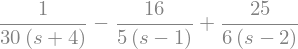

In [21]:
from sympy import *
s = symbols('s')
F = (s**2+ 6*s + 9)/((s-1)*(s-2)*(s+4))
apart(F)
# Partial fraction decomposition
# http://mattpap.github.io/scipy-2011-tutorial/html/partfrac.html

En los ejemplos 4 y 5, se ilustra el procedimiento básico de cómo usar la transformada de Laplace para resolver un problema lineal con valores iniciales, pero podría parecer que estos ejemplos demuestran un método que no es mucho mejor que el aplicado en los problemas descritos en las secciones 2.3 y $4.3$ a $4.6$.  

No saque consclusiones negativas de sólo dos ejemplos. 

## Comentarios 

1. La transformada de Laplace inversa de una función $F(s)$ podría no ser única; en otras palabras, es posible que $L\{f_{1}(t)\} = L\{f_{2}(t)\}$ y sin embargo $f_{1} \neq f_{2}$. 